# Imports

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB


# 1. Loading the Data

In [ ]:
path = '/content/drive/MyDrive/Springboard/CapstoneProject2/data/coupon_data2.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,...,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,temperature_30,temperature_55,temperature_80,has_children_0,has_children_1,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1,direction_same_0,direction_same_1,Y
0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
2,2,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1
3,3,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
4,4,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0


In [ ]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

# 2. Get X and y 

In [ ]:
X = df.iloc[:,:113]
X.head()

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),...,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,temperature_30,temperature_55,temperature_80,has_children_0,has_children_1,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1,direction_same_0,direction_same_1
0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0
1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0
2,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0
3,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
4,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0


In [ ]:
y = df.iloc[:,113]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Y, dtype: int64

# 3. Splitting the data into train and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

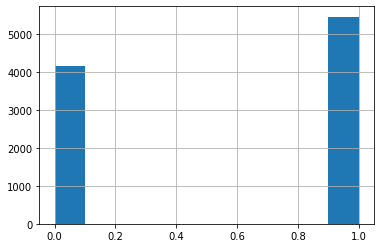

In [ ]:
y_train.hist()

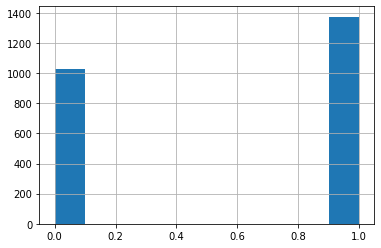

In [ ]:
y_test.hist()

# 4. Training Model

* According to the histogram above, the data has more label 1 than label 0, the data set is imblance. To see how much the model is capable of distinguishing between classes, f1 score will be used as a metric for the following grid search cross validation testing. 

## 4.1 Logistic Regresion Model

#### Greate pipeline of the logistic regresion model

In [ ]:
LogReg_pipe = make_pipeline(
    SelectKBest(f_regression),
    LogisticRegression())
LogReg_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'logisticregression', 'selectkbest__k', 'selectkbest__score_func', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

#### Set up the paremater k (the number of features used in the logistic regresion model) and Grid Search Cross Validation object

In [ ]:
k = [i for i in range(1, len(X_train.columns)+1)]
param_grid = {'selectkbest__k':k}
logReg_grid_cv = GridSearchCV(LogReg_pipe, 
                              param_grid=param_grid, 
                              scoring = 'f1',
                              cv=5, 
                              n_jobs=-1)

#### Train the logistic regression model

In [ ]:
logReg_grid_cv.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('selectkbest',
                                        SelectKBest(k=10,
                                                    score_func=<function f_regression at 0x7f20b58d77a0>)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                    

In [ ]:
print('The Best Score of the Logistic Regression Molde:', logReg_grid_cv.best_score_)
print('The Parameters of the Logistic Regression Molde:', logReg_grid_cv.best_params_)

The Best Score of the Logistic Regression Molde: 0.7400007969805494
The Parameters of the Logistic Regression Molde: {'selectkbest__k': 96}


In [ ]:
cols = logReg_grid_cv.best_estimator_
cols

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=96,
                             score_func=<function f_regression at 0x7f20b58d77a0>)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

#### Create a logistic regression model with 92 features

In [ ]:
Log_pipe = make_pipeline(
    SelectKBest(f_regression,k=92),
    LogisticRegression())
Log_pipe.fit(X_train,y_train)
y_pred = Log_pipe.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Plot the confusion matrix and get the classification report

Text(33.0, 0.5, 'True Label')

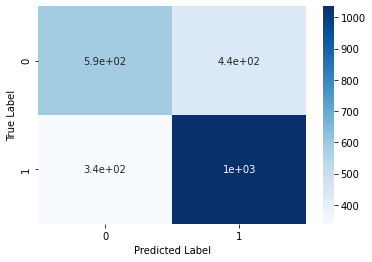

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.57      0.60      1028
           1       0.70      0.75      0.73      1374

    accuracy                           0.68      2402
   macro avg       0.67      0.66      0.67      2402
weighted avg       0.67      0.68      0.67      2402



* According to the classification report above, f1-score for label 1 is 0.73, label 0 is 0.60. This means that the logistic regression do better on predicting label 1. The accuracy is 0.68, which is quite low.

## 4.2 Random Forest model

#### Create Random Forest Object

In [ ]:
RF = RandomForestClassifier(random_state=42)
RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

#### Set up parameter grid 

In [ ]:
n_est = [int(n) for n in np.arange(start=50, stop=151, step=20)]
param_grid = { 
    'n_estimators': n_est,
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

#### Great gird search cross validation object and train the model

In [ ]:
RF_grid_cv = GridSearchCV(RF, 
                          param_grid, 
                          scoring = 'f1',
                          cv=5, 
                          n_jobs=-1)

In [ ]:
RF_grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

#### Check the Result

In [ ]:
RF_grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 110}

In [ ]:
RF_grid_cv.best_score_

0.7743424142868552

#### Predition and Confusion Matrix

In [ ]:
RF = RandomForestClassifier(criterion='entropy',
                            max_depth = 8,
                            max_features = 'auto',
                            n_estimators = 110,
                            random_state=42)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

Text(33.0, 0.5, 'True Label')

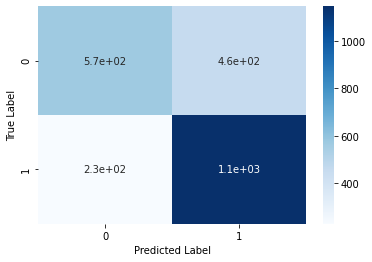

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62      1028
           1       0.71      0.83      0.77      1374

    accuracy                           0.71      2402
   macro avg       0.71      0.69      0.70      2402
weighted avg       0.71      0.71      0.71      2402



* Compared to the logistic regression, random forest model has a higher accuracy. However, the recall value on label 0 is only 0.55, which means that there is only 55% of true negative. Therefore, random forest model even did worest than the losgistic regression on predicting negative item. 

## 4.3 K-Nearest Neighbors

#### Create k-NN classifier object

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

#### Set up parameter grid and use the grid search cross validation to train the k-nn model

In [ ]:
param_grid = {'n_neighbors': np.arange(2,15),
              'weights': ['uniform', 'distance'] ,
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p':[1,2]
              }

In [ ]:
knn_grid_cv = GridSearchCV(knn, 
                           param_grid, 
                           scoring = 'f1',
                           cv=5, 
                           n_jobs=-1)
knn_grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

#### Get the best score and parameter set

In [ ]:
knn_grid_cv.best_score_

0.7425763995357995

In [ ]:
knn_grid_cv.best_params_

{'algorithm': 'brute', 'n_neighbors': 14, 'p': 1, 'weights': 'distance'}

#### Train the k-nn model using the best parameter set

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1,algorithm='brute',n_neighbors=14, p=1, weights='distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

#### Confusion matrix and classification report of the best k-nn model

Text(33.0, 0.5, 'True Label')

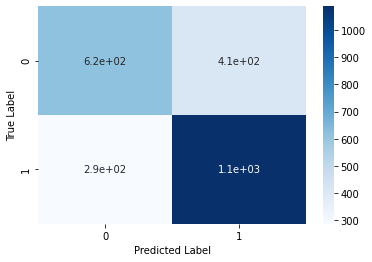

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64      1028
           1       0.73      0.79      0.76      1374

    accuracy                           0.71      2402
   macro avg       0.70      0.70      0.70      2402
weighted avg       0.71      0.71      0.71      2402



* The accuracy of the k-nn model is 0.71, which is about the same as the random forest model. However, this model has the highest recall score on label 0 comparing to the previous two model. It did the best on predicting label 0 so far. 

## 4.4 Support Vector Machine

#### Create Support Vector Machine calssifer model object

In [ ]:
svc = SVC()
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

#### Set up parameter grid and create grid search cross validation object

In [ ]:
param_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
               'gamma':['scale', 'auto']
               }
svc_grid_cv = GridSearchCV(svc, 
                           param_grid,
                           scoring = 'f1',
                           cv=5,
                           n_jobs=-1)

#### Train the model using grid search cross validation

In [ ]:
svc_grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

#### Get the best score and parameter set

In [ ]:
svc_grid_cv.best_score_

0.7917714371376181

In [ ]:
svc_grid_cv.best_params_

{'gamma': 'scale', 'kernel': 'poly'}

#### Use the best paramater set to create a SVC model and apply it to the test set

In [ ]:
svc = SVC(gamma='scale',kernel='poly')
svc.fit(X_test,y_test)
y_pred = svc.predict(X_test)

#### Confusion matrix and calssification report

Text(33.0, 0.5, 'True Label')

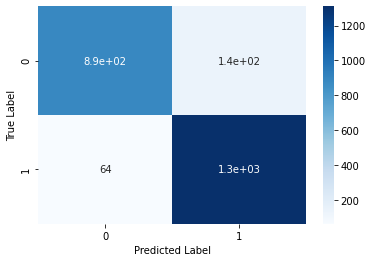

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1028
           1       0.90      0.95      0.93      1374

    accuracy                           0.92      2402
   macro avg       0.92      0.91      0.91      2402
weighted avg       0.92      0.92      0.92      2402



* Support Vector Classifer is the best model so far. It have 92% of accuracy, which is about 21% higher than the previous two. Also, the f1-score of both classes are relatively high  and quite close to each other, it mean that this model is capable of distinguishing between the two classes. 

## 4.5 Naive Bayes

#### Create the Bernoulli Naive Bayes model object

In [ ]:
BNB = BernoulliNB()
BNB.get_params().keys()

dict_keys(['alpha', 'binarize', 'class_prior', 'fit_prior'])

#### Set up parameter grid and use the grid search cross validation to train the Bernoulli Naive Bayes model

In [ ]:
param_grid = {'alpha':[0,1], 
              'binarize':[None,0.0],
              'fit_prior':[True, False]
              }

BNB_gird_cv = GridSearchCV(BNB, 
                           param_grid,
                           scoring = 'f1',
                           cv=5,
                           n_jobs=-1)

BNB_gird_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0, 1], 'binarize': [None, 0.0],
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

#### Get the best score and best parameter set of Bernoulli Naive Bayes model

In [ ]:
BNB_gird_cv.best_score_

0.7044649857841954

In [ ]:
BNB_gird_cv.best_params_

{'alpha': 1, 'binarize': None, 'fit_prior': True}

#### Use the best parameter set from above to train the Bernoulli Naive Bayes model and apply it to the test set

In [ ]:
BNB = BernoulliNB(alpha=1,fit_prior=True)
BNB.fit(X_train,y_train)
y_pred = BNB.predict(X_test)

#### Confusion matrix and classification report of the Bernoulli Naive Bayes model

Text(33.0, 0.5, 'True Label')

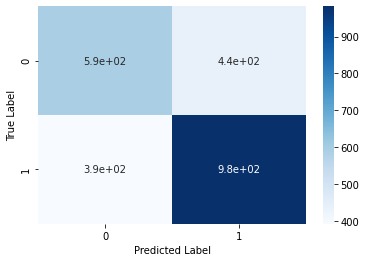

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.57      0.59      1028
           1       0.69      0.71      0.70      1374

    accuracy                           0.65      2402
   macro avg       0.65      0.64      0.65      2402
weighted avg       0.65      0.65      0.65      2402



* Naive Bayes is not the right model for this data set. 

## 4.6 Gradient Boosting

#### Create Gradient Boosting classifier object

In [ ]:
GBC =GradientBoostingClassifier()
GBC.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

#### Set up the parameter set and use grid search cross validation to train the Gradient Boosting model

In [ ]:
param_grid = {'learning_rate':[0.09, 0.10,0.11,0.12], 
              'n_estimators':[100, 120, 140 ,160],
              'max_depth':[5,6,7,8,9],
              #'max_features':['auto', 'sqrt', 'log2']
              }

GBC_gird_cv = GridSearchCV(GBC, 
                           param_grid,
                           scoring = 'f1',
                           cv=5,
                           n_jobs=-1)
GBC_gird_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.11,
                                                  loss='deviance', max_depth=8,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=200,
                                                  n_iter_no_change=None,
        

#### Get the best score and parameter set

In [ ]:
GBC_gird_cv.best_score_

0.7929224118606601

In [ ]:
GBC_gird_cv.best_params_

{'learning_rate': 0.12, 'max_depth': 6, 'n_estimators': 140}

#### Use the best parameter set to train a Gradient Boosting classifier

In [ ]:
GBC =GradientBoostingClassifier(learning_rate=0.12, max_depth=6, n_estimators=140)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)

#### Confusion matrix and classification report of the Gradient Boosting model

Text(33.0, 0.5, 'True Label')

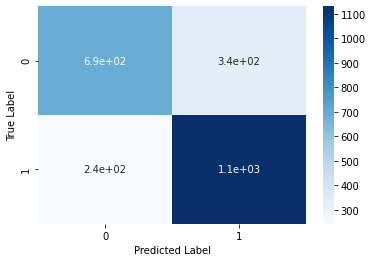

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1028
           1       0.77      0.82      0.80      1374

    accuracy                           0.76      2402
   macro avg       0.76      0.75      0.75      2402
weighted avg       0.76      0.76      0.76      2402



* Gradient Boosting is not as good as Support Vector Classifer, but did better than the other 4. Still, it is not good at predicting negative item.

# 5. Model Comparision

In [ ]:
models = [Log_pipe,RF,knn,svc,BNB,GBC]
models_name = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors', 'Support Vector Classifer','Bernoulli Naive Bayes', 'Gradient Boosting']

In [ ]:
print('Classification Report')
print()

for i, model in enumerate(models):
  y_pred = model.predict(X_test)
  print(models_name[i])
  print('-----------------------------------------------------')
  print(classification_report(y_test,y_pred))
  print()

Classification Report

Logistic Regression
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.57      0.60      1028
           1       0.70      0.75      0.73      1374

    accuracy                           0.68      2402
   macro avg       0.67      0.66      0.67      2402
weighted avg       0.67      0.68      0.67      2402


Random Forest
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.55      0.62      1028
           1       0.71      0.83      0.77      1374

    accuracy                           0.71      2402
   macro avg       0.71      0.69      0.70      2402
weighted avg       0.71      0.71      0.71      2402


K-Nearest Neighbors
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.60      0.64      1

* The data above are the Classification Report of each model with the best parameter set from the grid seach cross validation testing. All the models have a higher f1-score on label 1 than babel 0, which means that all of them do better on predicting positive values. Bernoulli Naive Bayes model has the lowest accuracy, which is 0.65. The Random Forest has the lowest recall score on label 0, which is 0.55. This means that it cannot predict the negative item very well.
 

* The Support Vector Classifier model is the best model, it has the highest scores on every metric. The accuracy is 0.92, which is at least 14% higher than other models. Even though the f1-score of label 1 is higher than label 0, they are very close. The Support Vector Classifier model does the best on optimizing true negatives compared to the five other models. 
 